# Personal Loan Risk analysis
* We will be performing the analysis on the dataset to find the risk factor of approving or not approving a loan to an applicant.

* The analysis is divided into 4 main parts:
1. Data understanding
2. Data cleaning (handling missing values, removing redundant / unnecesssary columns, etc.,.)
3. Data analysis (Univariate , bivariate/multivariate)
4. Recommendations and conculsions

-------------

#### Importing the required libraries
1. pandas
2. numpy
3. matplotlib
4. seaborn
5. datetime

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [162]:
# Reading the dataset
inp0 = pd.read_csv('loan.csv')
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\balas\AppData\Local\Temp\ipykernel_24096\956609757.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  inp0 = pd.read_csv('loan.csv')


---------------

### Understanding data

In [163]:
inp0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [164]:
# Taking a look at all the column names
inp0.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

The **Target Variable**, which we have to compare and analyse across other variables is **loan status**. One way to approach the analysis is to compare the average default rates across various independent variables and identify the ones that affect the default rate the most.

Some of the important columns for the analysis in the dataset are loan_amount, interest rate, grade, sub grade, annual income, purpose of the loan, etc..

Now, let's get into the data cleaning part of the analysis

--------------

## Data Cleaning

Let;s start with handling the missing values. 

Find the number of missing values in each column.

In [165]:
# summarising the number of missing values in each column
inp0.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [166]:
# percentage of missing values in each column
round(inp0.isnull().sum()/len(inp0.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

Many of the columns have large percentages of missing values in them. 

In [167]:
# finding the columns having more than 90% missing values.
missing_columns = inp0.columns[100*(inp0.isnull().sum()/len(inp0.index)) > 90]
missing_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

Columns with more than 90% missing data is not usefull for the analysis, therefore we should drop the columns.

In [168]:
inp0 = inp0.drop(missing_columns, axis=1)
print(inp0.shape)


(39717, 55)


Let's summarise the number of missing values in the dataset now.

In [169]:
100*(inp0.isnull().sum()/len(inp0.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


Two columns have relatively high percentages of missing values in them, desc (32%) and months since last delinquent (64%)
Let's have a look at a few entries in the columns

In [170]:
inp0.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


##### desc column:
* The **desc** column contains the comments that the applicant has written while applying for the loan. This is not useful for our analysis.
* So, we will drop this column.

##### mnths_since_last_delinq column:
* This column represents the number months passed since the person last fell into the 90 DPD group. There is an important reason we shouldn't use this column in analysis - since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval. 
* So, we will drop this column.

In [171]:
# dropping the two columns
inp0 = inp0.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [172]:
# summarise number of missing values again
100*(inp0.isnull().sum()/len(inp0.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

There are some more columns with missing values, but let's ignore them for now (since we are ntot doing any modeling, we don't need to impute all missing values anyway). 

But let's check whether some rows have a large number of missing values.

In [173]:
# missing values in rows
inp0.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [174]:
# checking whether some rows have more than 5 missing values
len(inp0[inp0.isnull().sum(axis=1) > 5].index)

0

The data looks clean by and large with regards to the missing values.

Now let's check if all the columns are in the correct format.

In [175]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Some of the columns are in object type when they are supposed to be numeric.

Let's check and change the dtypes of these columns

In [176]:
# Let's analyse the column int_rate 
inp0.int_rate.head()


0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

The values have '%' at the end which we have to remove and change it to float

In [177]:
inp0['int_rate'] = inp0['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))


In [178]:
inp0.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [179]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
inp0 = inp0[~inp0['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
inp0['emp_length'] = inp0['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
inp0['emp_length'] = inp0['emp_length'].apply(lambda x: pd.to_numeric(x))

In [180]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  38642 no

Now let's go to the enxt and important part of EDA

------

## Data Analysis

Let's now move to data analysis. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis. 

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 
1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 

2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 

3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

Thus, going forward, we will use only the other two types of variables.


To make it simpler and easier to do the analysis, let's drop the customer behaviour variables from the dataset.

In [181]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

Let's drop these columns and store it in a new dataset just to be on the safer side.

In [182]:
# let's now remove the behaviour variables from analysis
df = inp0.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  38642 no

* variables such as **acc_now_delinquent**, **chargeoff within 12 months**, etc.. will be availabe since they are related to the past loans of the applicant.

* Also, variables like **zip code, address, state, title**, etc are not useful.

Let's drop these columns

In [183]:
df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

Let's look at the target variable - **loan_status**

In [184]:
df.loan_status.value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

Let's change the values to category type and replace with 0 and 1 to make it easier for analysis.
The ones mrked 'current' are neither fully paid nor defaulted, so they are of no value to our analysis. Let's drop them.

In [185]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [186]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

loan_status
0    32145
1     5399
Name: count, dtype: int64

Lets extract year and month for better analysis

In [191]:
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [192]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

----

## Univariate Analysis

##### Overall default rate.

In [193]:
# default rate
round(np.mean(df['loan_status']), 2)*100

14.000000000000002

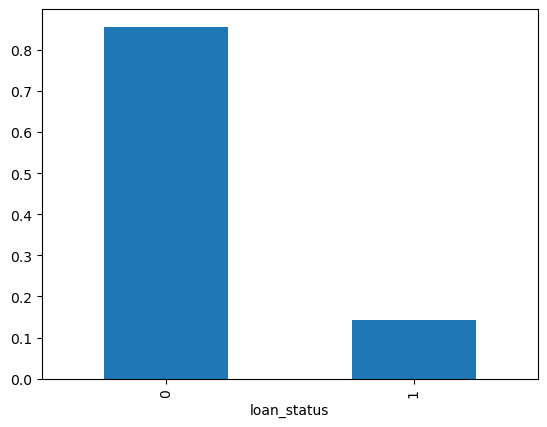

In [194]:
df.loan_status.value_counts(normalize = True).plot.bar()
plt.show()

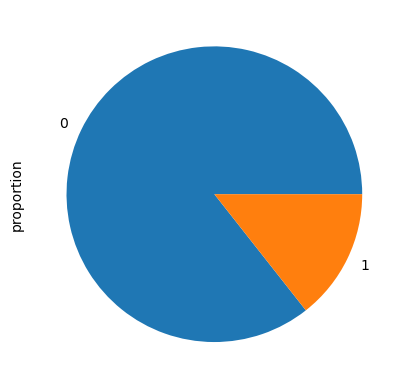

In [202]:
df.loan_status.value_counts(normalize = True).plot.pie()
plt.show()

The overall default rate is about **14%**.



##### loans over years

In [195]:
df.year.value_counts(normalize = True)*100

year
2011    52.740784
2010    29.868954
2009    12.561261
2008     4.160452
2007     0.668549
Name: proportion, dtype: float64

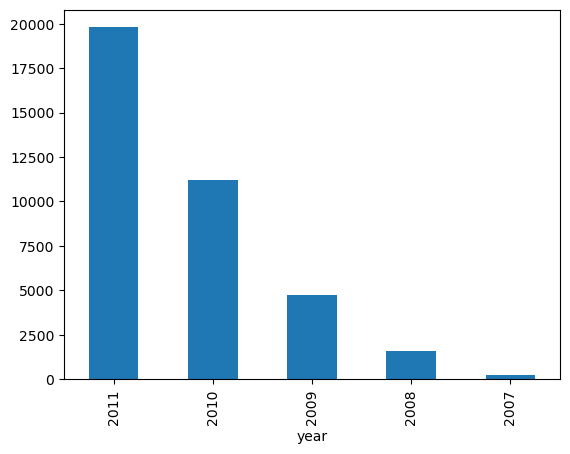

In [196]:
df.year.value_counts().plot.bar()
plt.show()

the number of loans increased from 2007 to 2011

##### Loan purpose distribution

In [197]:
df.purpose.value_counts(normalize = True)*100

purpose
debt_consolidation    47.078095
credit_card           13.048690
other                  9.889729
home_improvement       7.417963
major_purchase         5.540166
small_business         4.554656
car                    3.856808
wedding                2.431813
medical                1.747283
moving                 1.470275
house                  0.942894
vacation               0.926912
educational            0.844343
renewable_energy       0.250373
Name: proportion, dtype: float64

<Axes: xlabel='purpose'>

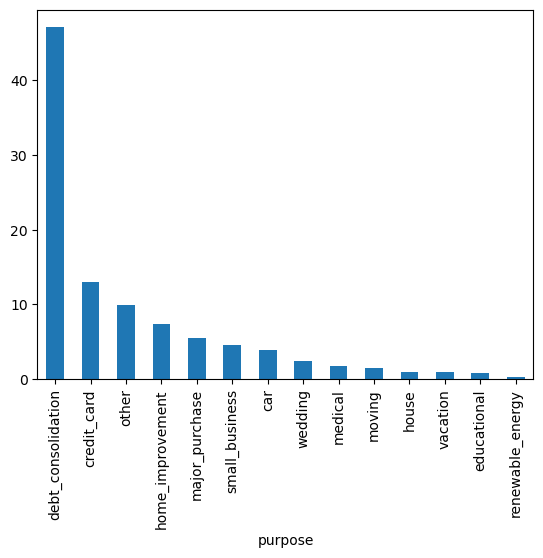

In [204]:
(df.purpose.value_counts(normalize = True)*100).plot.bar()

* debt consolidation has the highest number of loans at 47% of the total
* followed by credit car, home improvement and major purchase

------

## Bivariate Analysis

### Default rate VS categorical variables

In [37]:
# define a function to make it easier to plot bar plots with various variables.
def plot_bar(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

##### loan status vs grade of loan

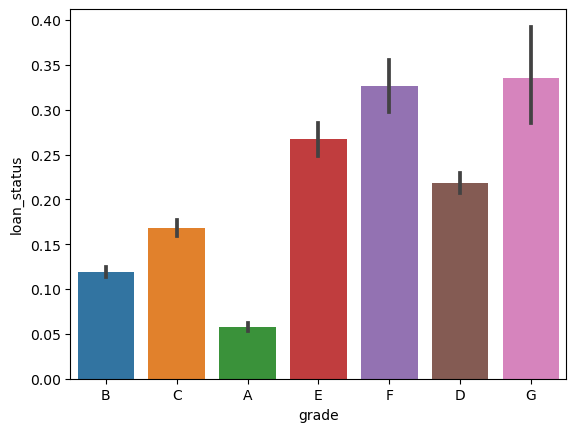

In [38]:
# compare default rates across grade of loan
plot_bar('grade')

Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

##### Loan status vs sub-grade

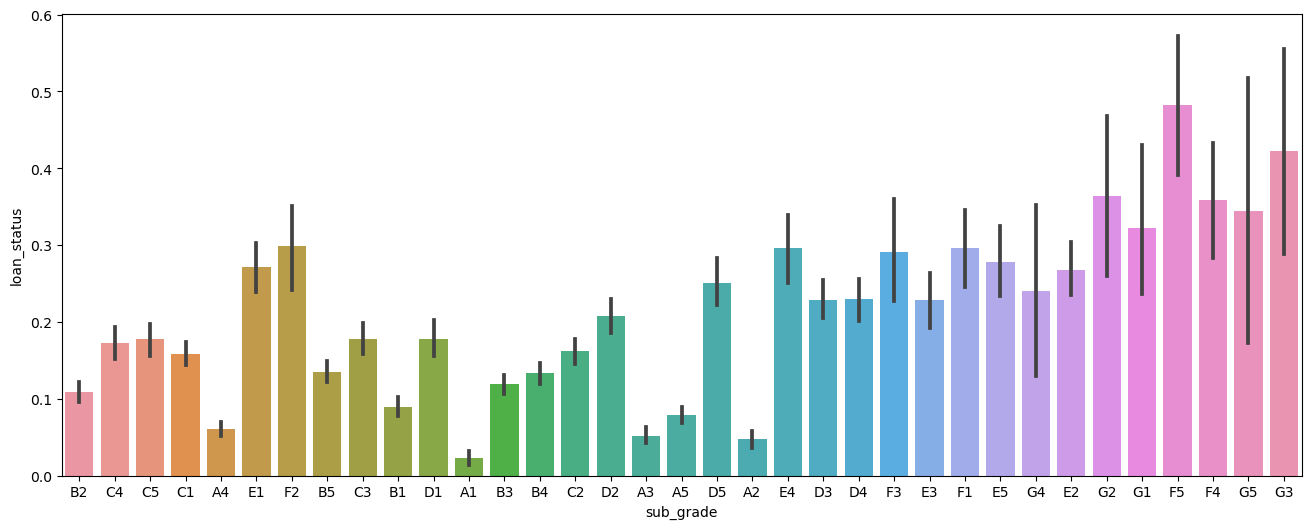

In [41]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
plot_bar('sub_grade')

##### default rate vs term

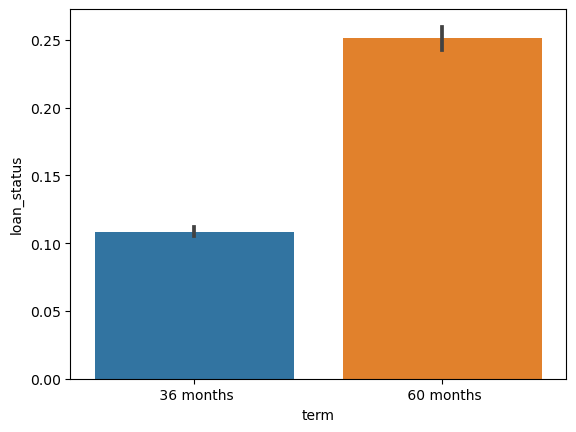

In [39]:
# term: 60 months loans default more than 36 months loans
plot_bar('term')

The longer the term the more default rate.

##### default rate vs home ownership

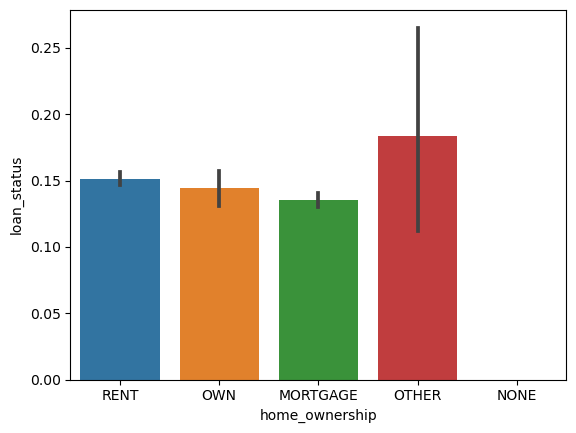

In [42]:
plot_bar('home_ownership')

Home ownership doesnot have a drastic affect on the loan default rate.
therefore it is not a valuable parameter to be considered.


##### Default rate vs verification status

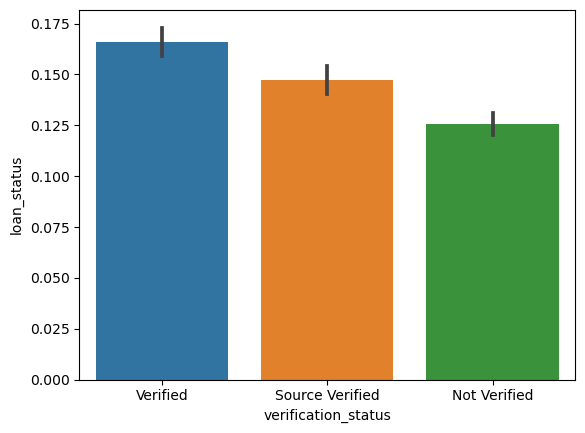

In [43]:
plot_bar('verification_status')

* Surprisingly, verified loans default more than not verified.
* this could be because more loans are given to the verified applicants than not verified which inadvarently increases the chances of defaulting.

Still, the difference between verified and not verified loans si not huge to be used as a valuable factor.

##### default rate vs purpose

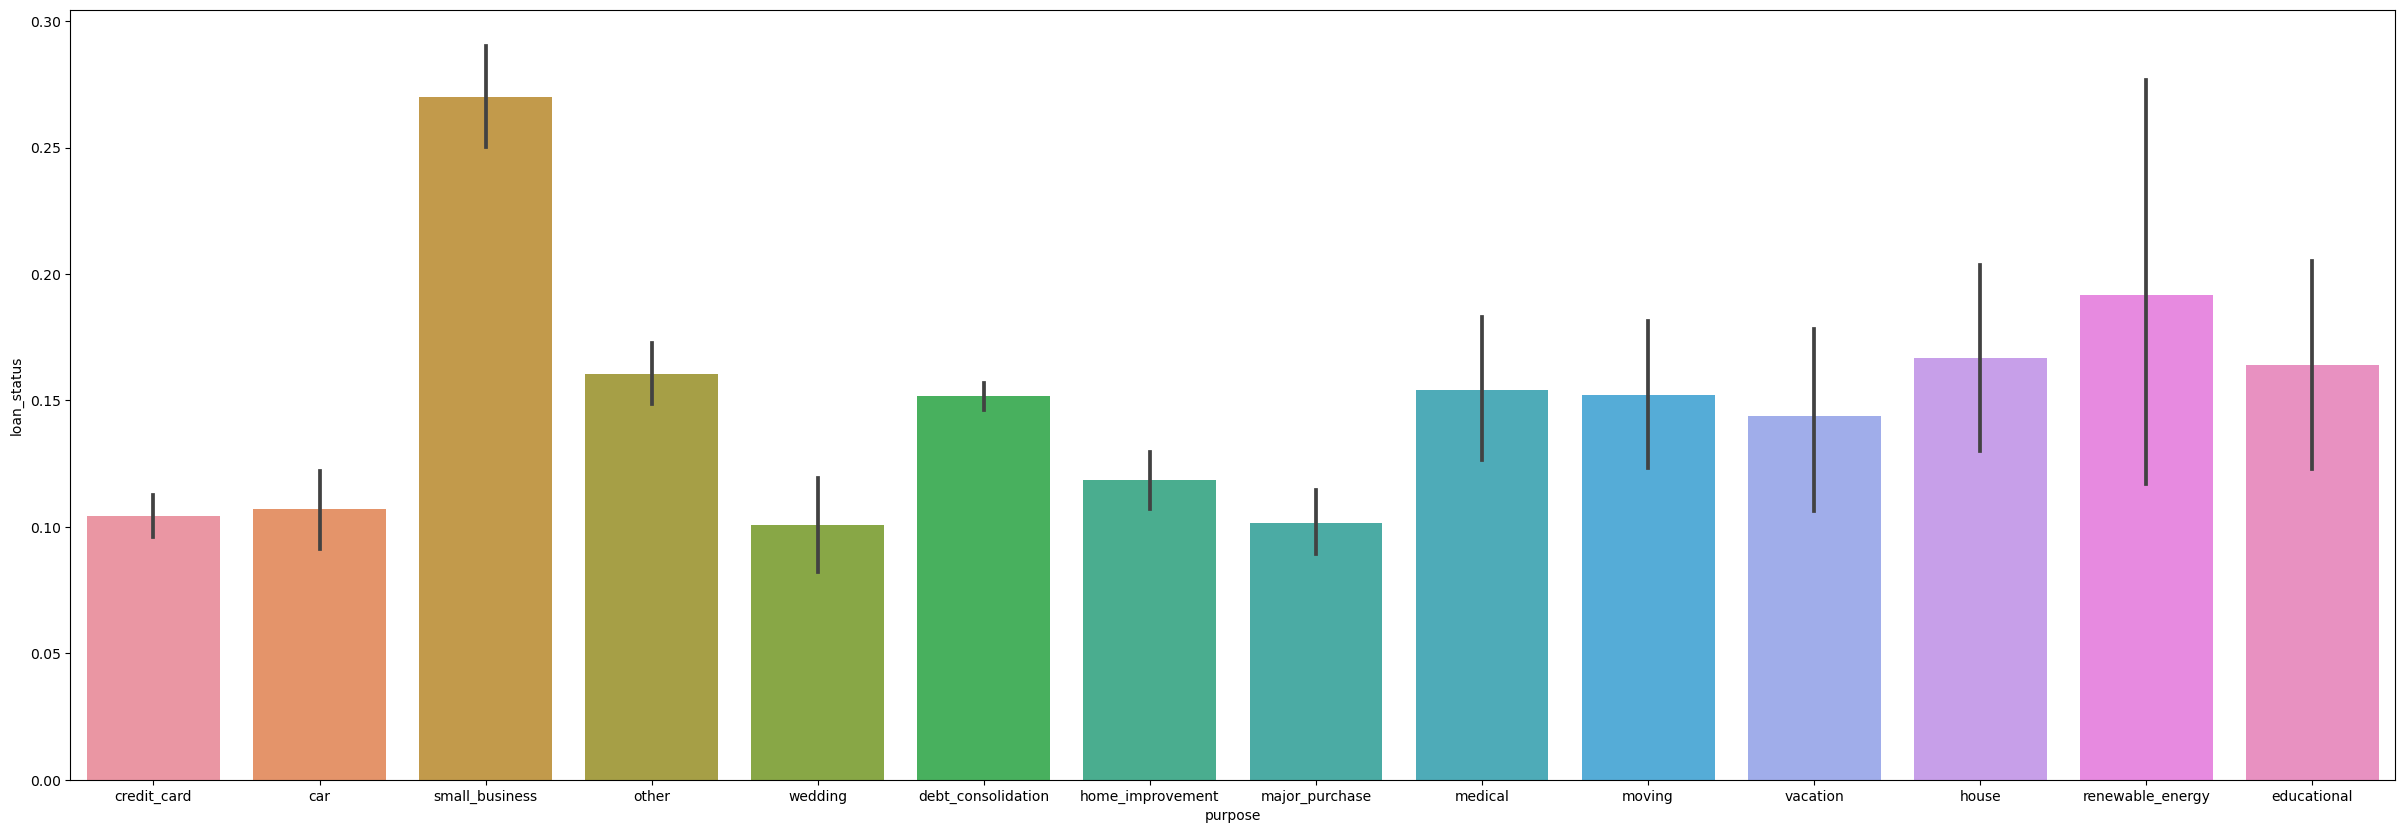

In [48]:
plt.figure(figsize=(30, 10))
plot_bar('purpose')

**small business loans, renewable energy and education loans** have the highest default rates

##### default rate vs year/month

##### default rate vs years

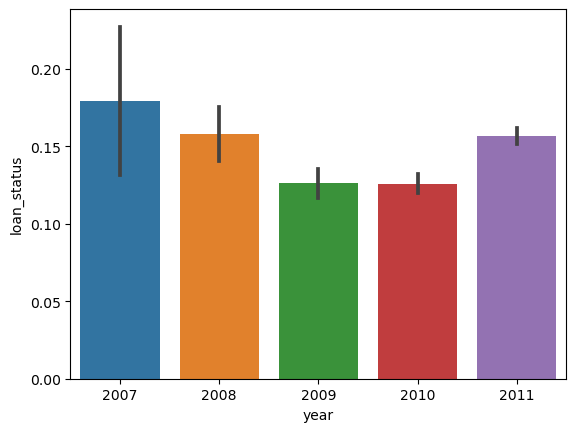

In [56]:
plot_bar('year')

The default rate gradually decreased from 2007 to 2010 but there was a sudden spike in default rate in 2011.
This could be due to economy crash in the year 2011.

##### default rate vs months

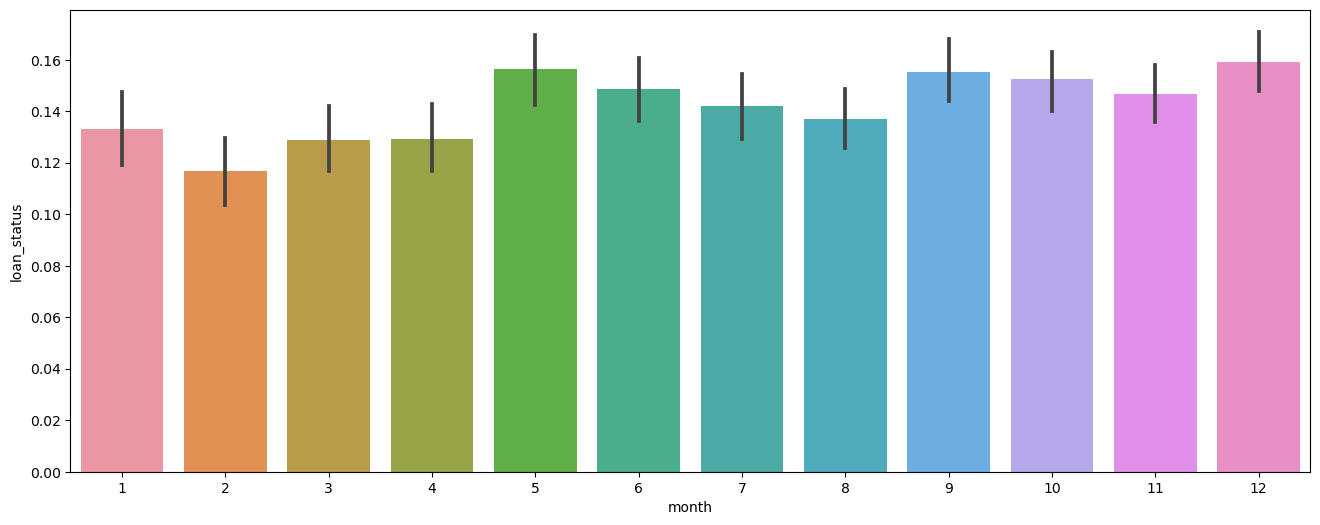

In [57]:
plt.figure(figsize=(16, 6))
plot_bar('month')

month of approving the loan has no affect on the default rate.

### Default rate vs continuous variables

##### loan amount

In [58]:
df.loan_amnt.describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Loan amount has 
* mean - 11119
* median - 10000

The best way to analyse continuous variables is to divide the variable into bins

##### default rate vs loan amount

Divide the loan amount into bins 
- 0 to 5000 :      Low
- 5000 to 15000 :  Medium
- 15000 to 25000 : High
- greater than 25000 :         Very high

In [66]:
df['loan_amnt_group'] = pd.cut(df.loan_amnt, [0,5000,15000,25000,1000000], labels = ['Low', 'Medium', 'High', 'Very High'])

In [67]:
df.loan_amnt_group.value_counts(normalize = True)*100

loan_amnt_group
Medium       53.278820
Low          24.115704
High         18.844556
Very High     3.760921
Name: proportion, dtype: float64

Medium loan amount has the highest percentage of loans

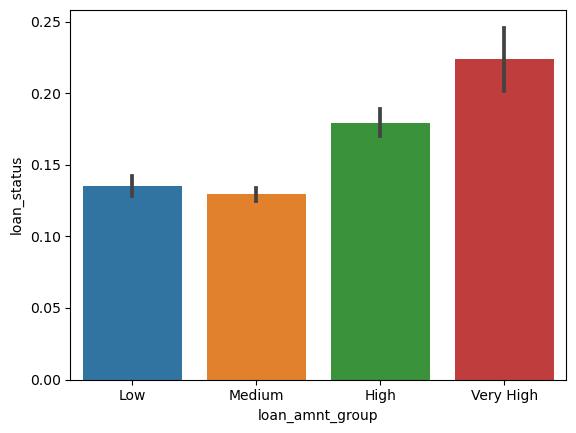

In [64]:
plot_bar('loan_amnt_group')

The higher the loan amount the higher the default rate.

##### default rate vs funded amount invested

converting funded amount invested into bins:
- 0 to 5000 :      Low
- 5000 to 15000 :  Medium
- 15000 to 25000 : High
- greater than 25000 :         Very high

In [68]:
df['funded_amnt_inv_group'] = pd.cut(df.funded_amnt_inv, [0,5000,15000,25000,1000000], labels = ['Low', 'Medium', 'High', 'Very High'])

In [69]:
df.funded_amnt_inv_group.value_counts(normalize = True)*100

funded_amnt_inv_group
Medium       53.144461
Low          27.125484
High         16.568221
Very High     3.161833
Name: proportion, dtype: float64

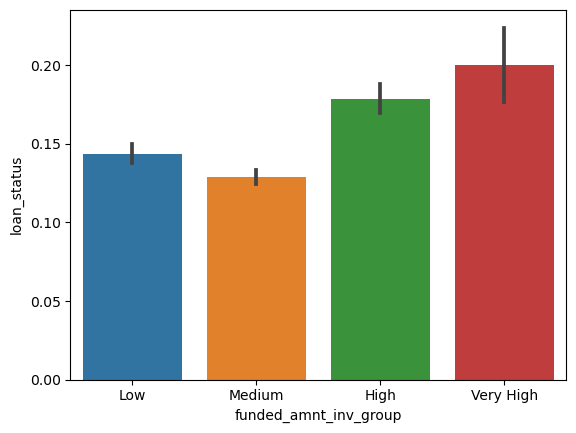

In [70]:
plot_bar('funded_amnt_inv_group')

the funded amount invested has a very similar default rates as the loan amount

##### default rate vs interest rate

convert interest rates into bins:
* 0-10: Low
* 10-15: Medium
* 15 and above: High

In [71]:
df['interest_group'] = pd.cut(df.int_rate, [0,10,15,100], labels = ['Low', 'Medium', 'High'])

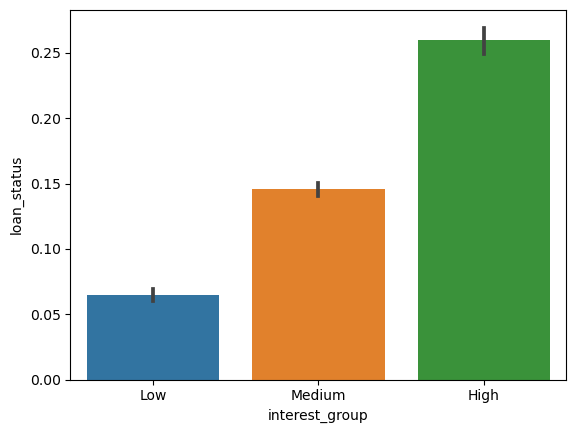

In [74]:
plot_bar('interest_group')

As expected, the higher the interest rate the higher the default rate.

##### Default rate vs debt to income ratio

convert debt to income ratio into bins:
* 0-10: Low
* 10-20: Medium
* 20 or more: High

In [77]:
df['dti_group'] = pd.cut(df.dti, [0,10,20,100], labels = ['Low', 'Medium', 'High'])

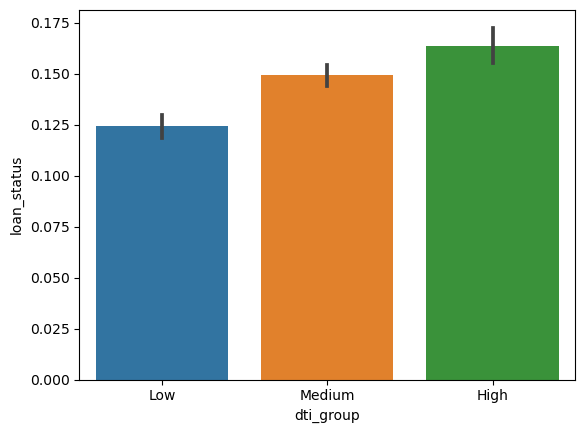

In [78]:
plot_bar('dti_group')

Higher the debt to income ratio, higher the default rate. Which can be expected as the higher the dti ratio means that the applicant has more debt with respect to his/her income which can make it difficult for them to repay the loan.

##### default rate vs installment

convert installments into bins:
* 0-200: Low
* 200-400: Medium
* 400-600: High
* more than 600: Very High

In [79]:
df['installments_group'] = pd.cut(df.installment, [0,200,400,600,10000], labels = ['Low', 'Medium', 'High', 'Very High'])

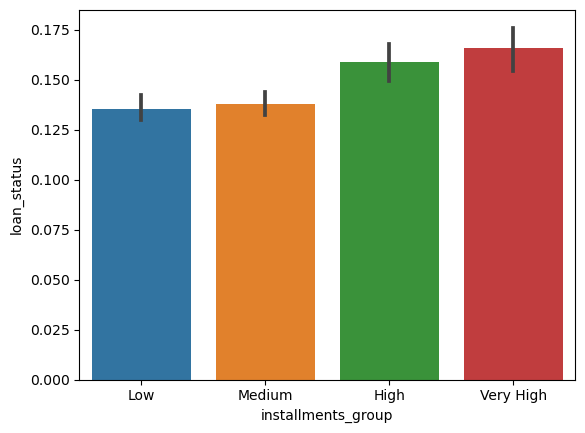

In [80]:
plot_bar('installments_group')

the higher the installment amount, the higher the default rate

##### default rate vs annual income

convert annual incomes into bins:
* 0-50000: Low
* 50000-100000: Medium
* 100000-150000: High
* more than 150000: Very High

In [81]:
df['income_group'] = pd.cut(df.annual_inc, [0,50000,100000,150000,1000000], labels = ['Low', 'Medium', 'High', 'Very High'])

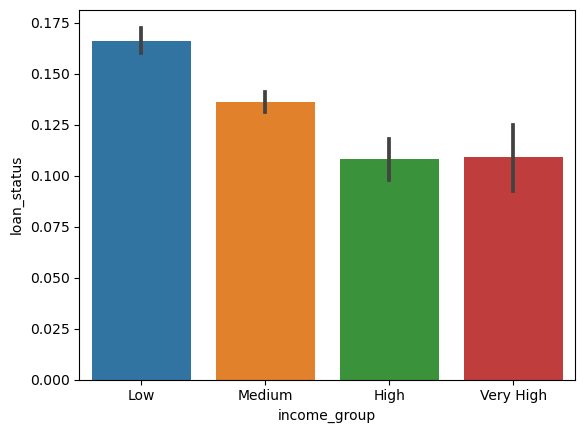

In [82]:
plot_bar('income_group')

Lower annual income means higher default rate

##### default rate vs employment length

convert employment length into bins:
* o-1: fresher
* 1-3: junior
* 3-7: senior
* more than 7: expert

In [83]:
df['employment_group'] = pd.cut(df.emp_length, [0,1,3,7,100], labels = ['fresher', 'junior', 'senior', 'expert'])

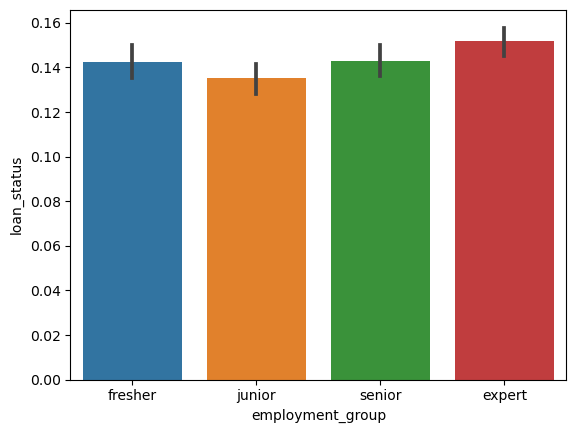

In [85]:
plot_bar('employment_group')

The length of employment is not a strong predictor of default rate 


-------------------------------------------------------------------------

We have compared the default rate across various variables, and some of the important predictors are:
* purpose of loan
* interest rate
* annual income
* grade
* installment amount
* debt to income ratio
* loan amount

-----------------------------

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

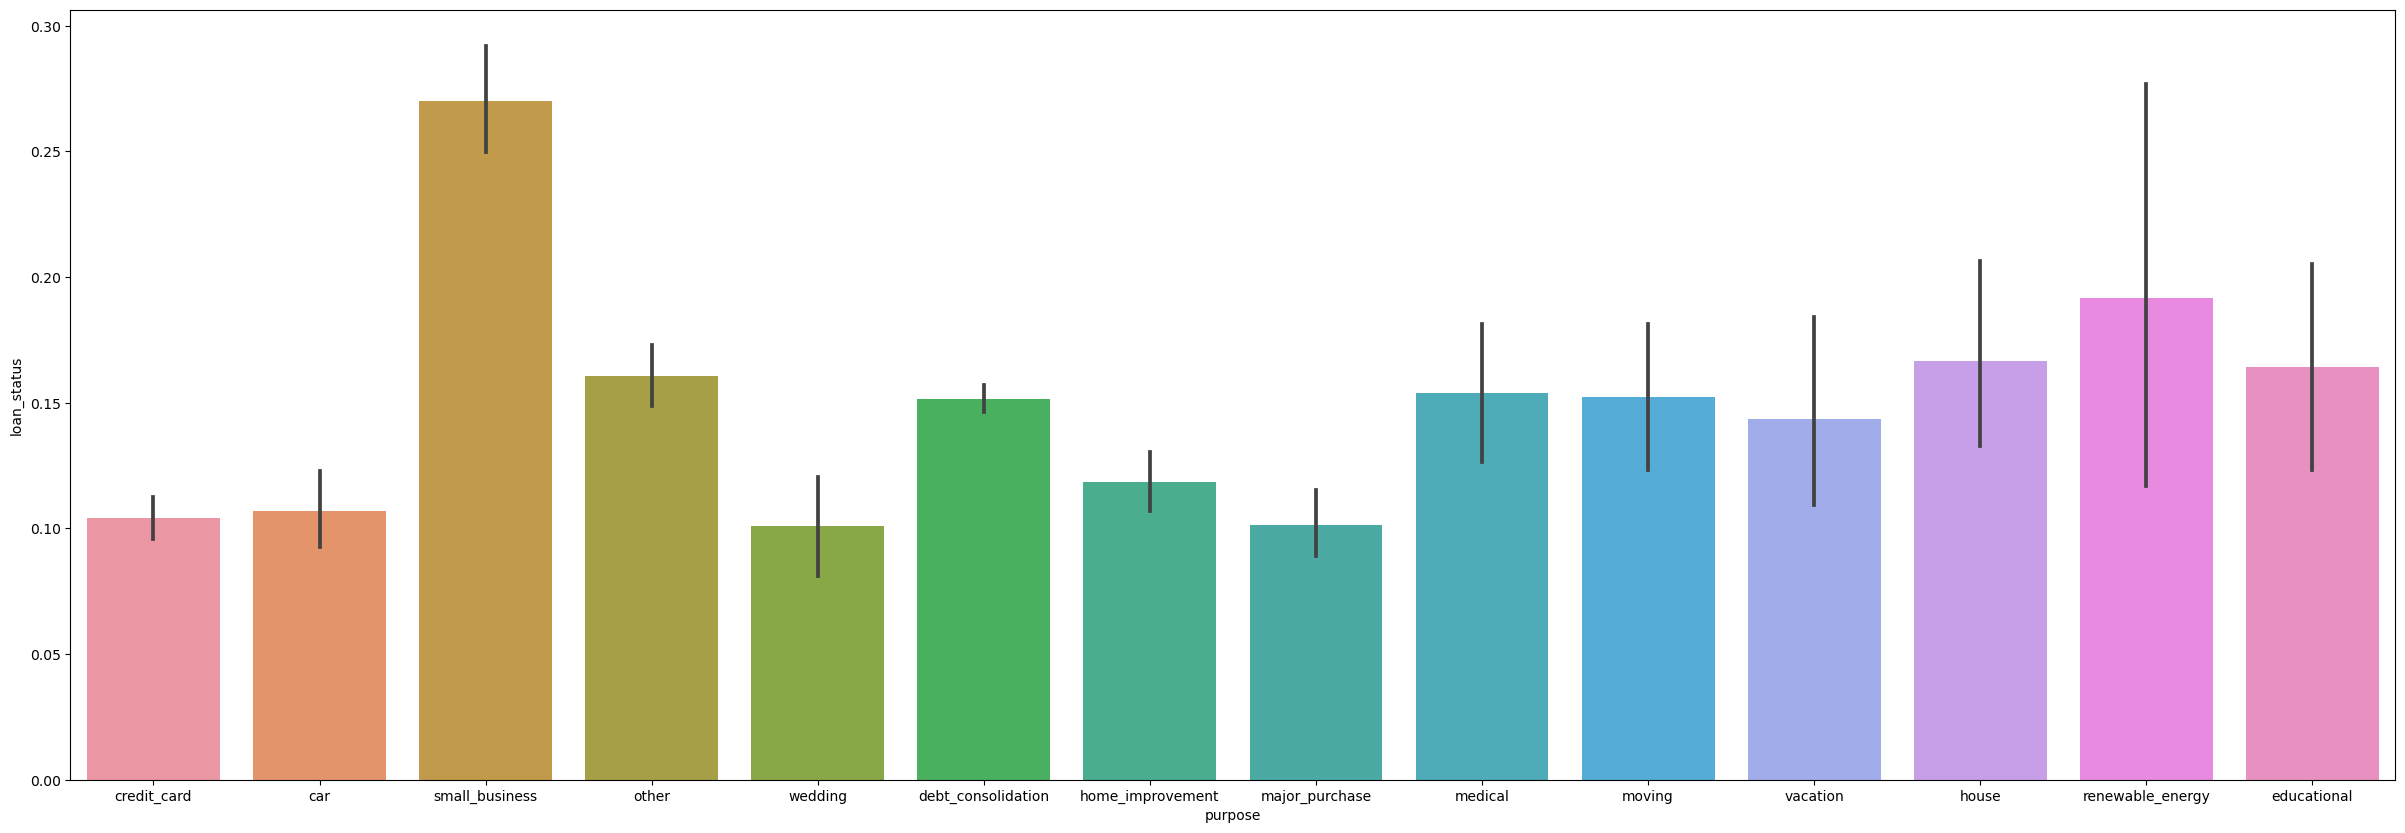

In [88]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(30, 10))
plot_bar('purpose')

in further analysis, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally default rate.

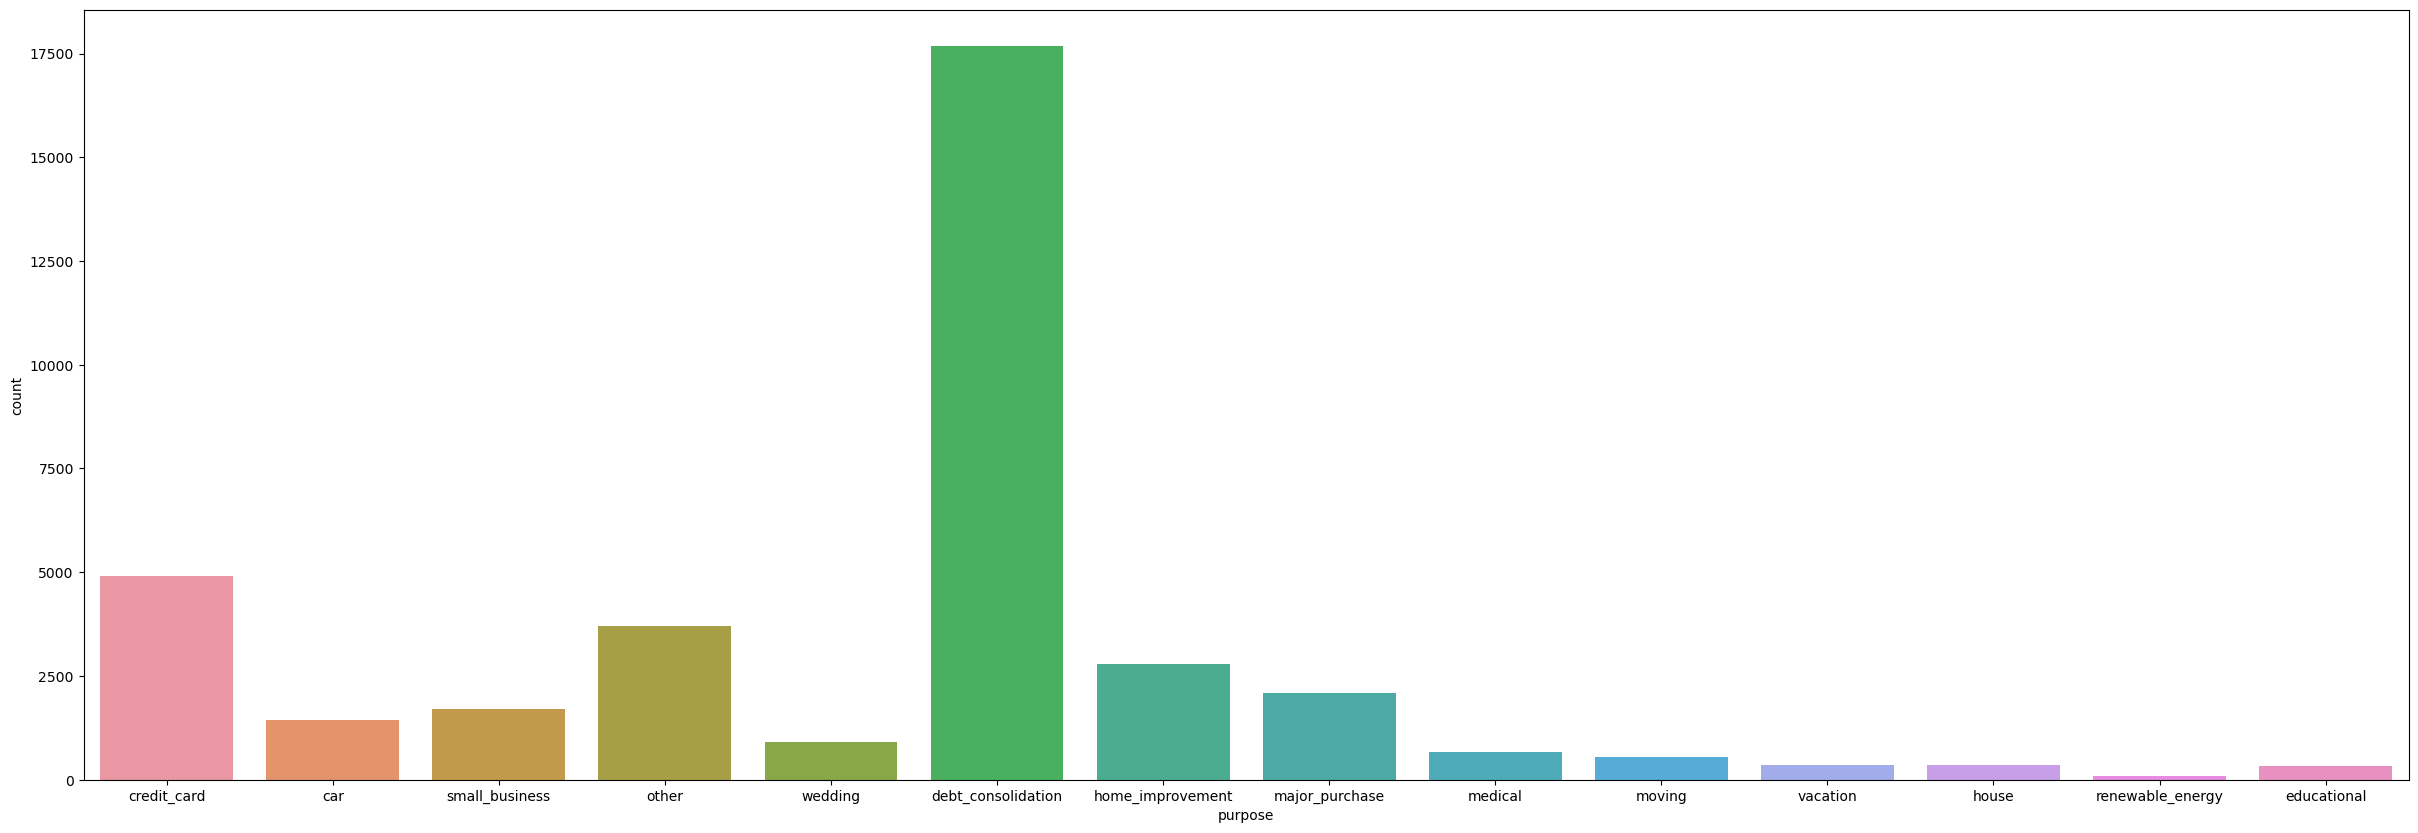

In [89]:
# lets first look at the number of loans for each type (purpose) of the loan
plt.figure(figsize=(30, 10))
sns.countplot(x='purpose', data=df)
plt.show()


most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.

let's analyse the top 4 types of loans:
* debt consolidation
* credit card
* home improvement
* major purchase

In [90]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card", "debt_consolidation", "home_improvement", "major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

purpose
debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: count, dtype: int64

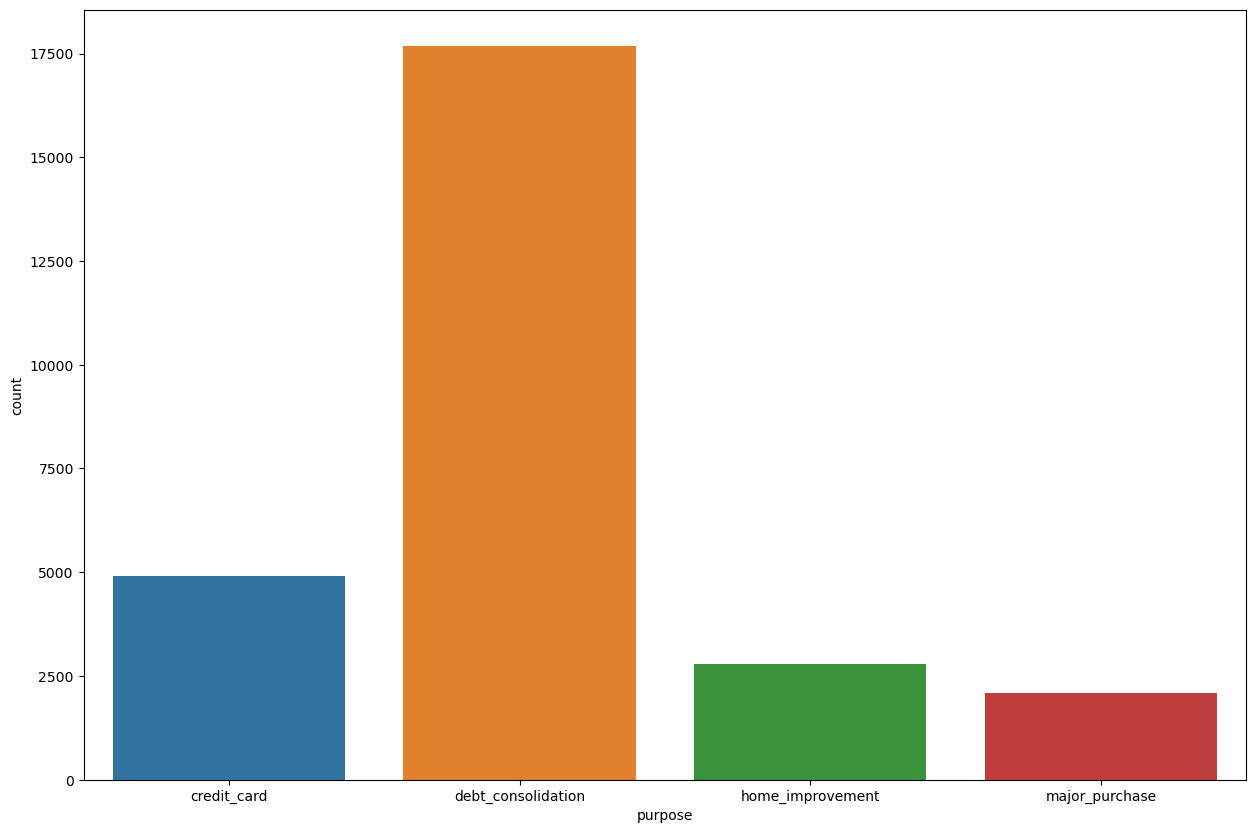

In [93]:
# plotting number of loans by purpose 
plt.figure(figsize = [15,10])
sns.countplot(x=df['purpose'])
plt.show()

Let's compare default rate with two variables (purpose of the loan as one constant)

## Multivariate Analysis

In [108]:
# lets write a function which takes a categorical variable and plot a bar plot the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

In [118]:
# lets write a function to plot a heatmap with the same variables
def plot_heat(var):
    plt.figure(figsize = [10,6])
    res = pd.pivot_table(data = df, index = 'purpose', columns = var, values = 'loan_status')
    sns.heatmap(res, annot = True, cmap = 'coolwarm')
    plt.show()

##### purpose of loan vs term vs default rates

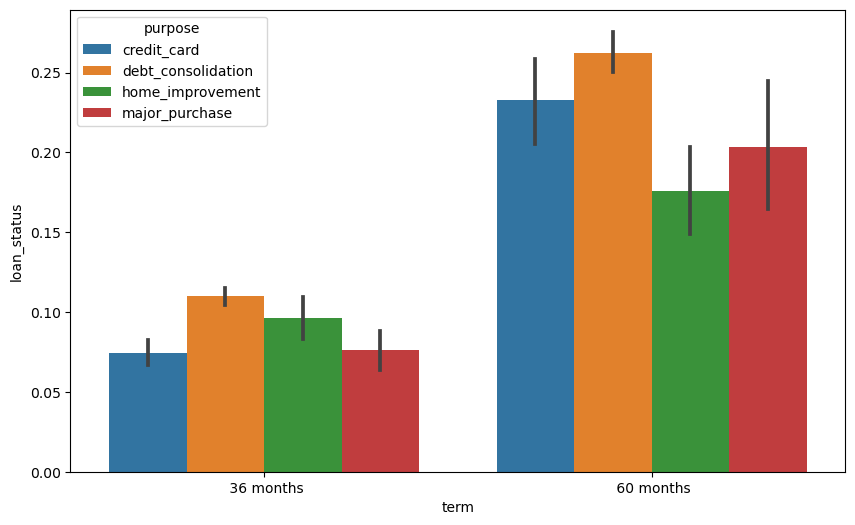

In [119]:
plot_segmented('term')

the **60 month - debt consolidation** combination has the highest default rates

A heatmap will help us understand the correlation better between the variables

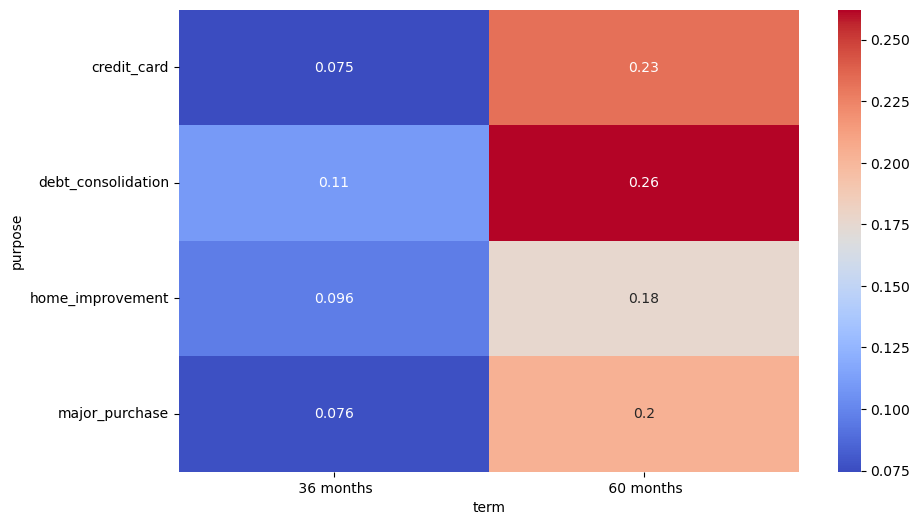

In [120]:
plot_heat('term')

We can clearly see from the heatmap that
* In both terms debt consolidation has the higher default rate
* in general 36 months term has a lower default rate than 60 months term
* 60 months - debt consolidation has the highest default rate among all combinations.

##### Default rate vs purpose vs grade

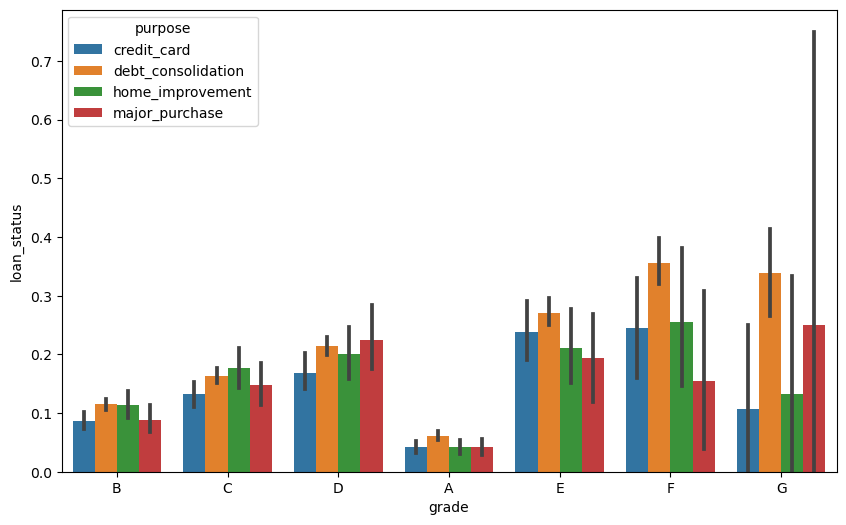

In [97]:
plot_segmented('grade')

* In higher grades (E,F,G and A), **debt consolidation** has a higher default rate
* In lower grades (B,C,D), **Home improvement, major puchase** seem to have a relatively higher default rate

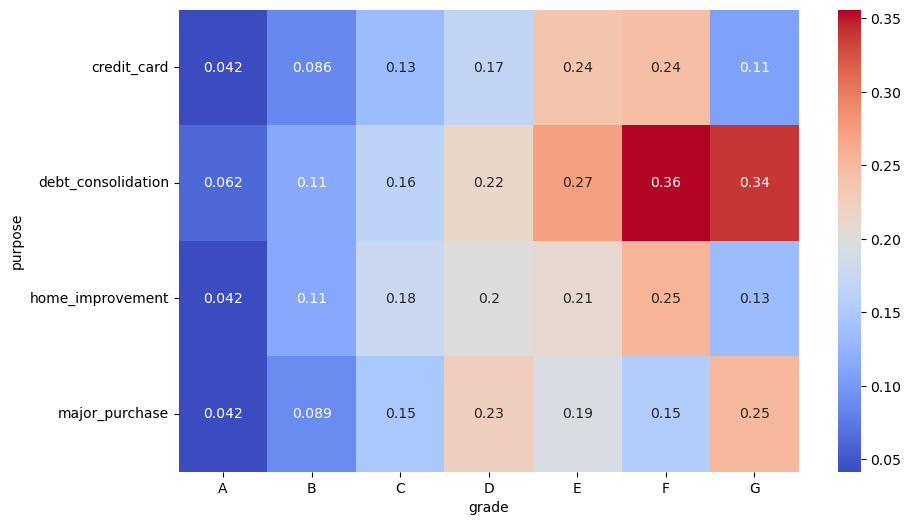

In [121]:
plot_heat('grade')

we can see that
* the default rate increases as we move from grade A to G.
* debt consolidation has the higher default rate in general.
* grade F - debt consolidation has the highest default rate of all the combinations

##### Default rate vs purpose vs home ownership

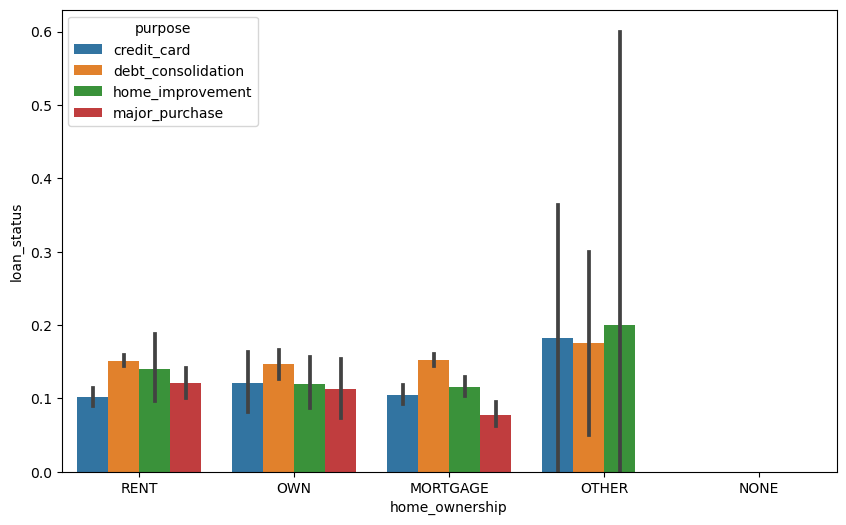

In [98]:
# home ownership
plot_segmented('home_ownership')

In general, **debt consolidation** have a higher default rates

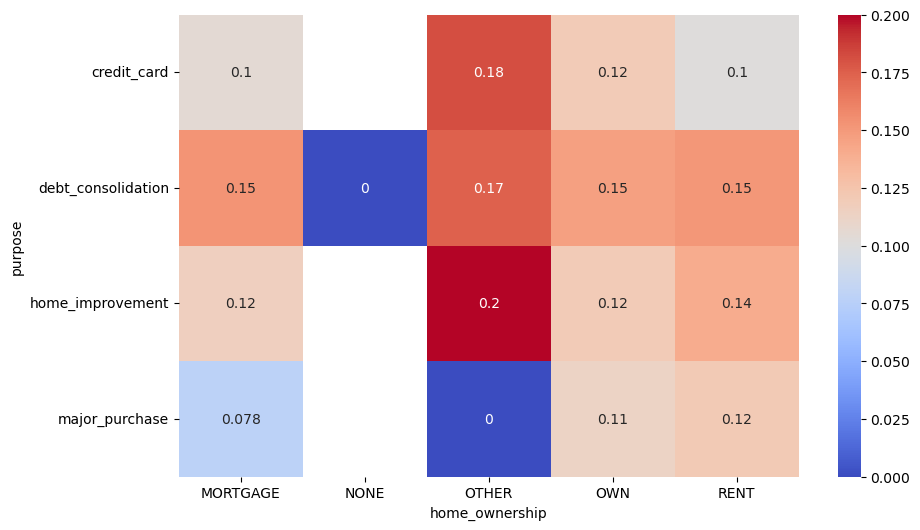

In [122]:
plot_heat('home_ownership')

We can see that
* even though debt consolidation has a slightly higher default rate, but in general the home ownership has minimum affect on the default rates.

##### Default rate vs purpose vs year

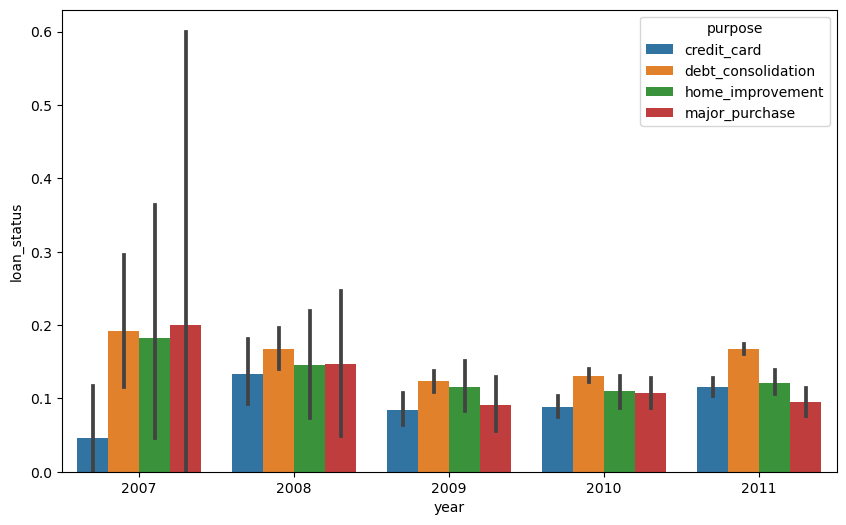

In [99]:
# year
plot_segmented('year')

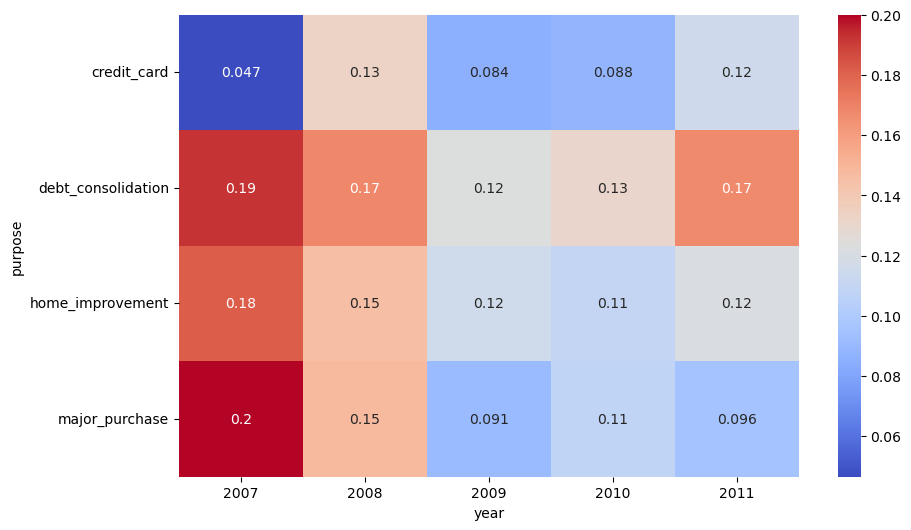

In [123]:
plot_heat('year')

##### Default rate vs purpose vs employee length

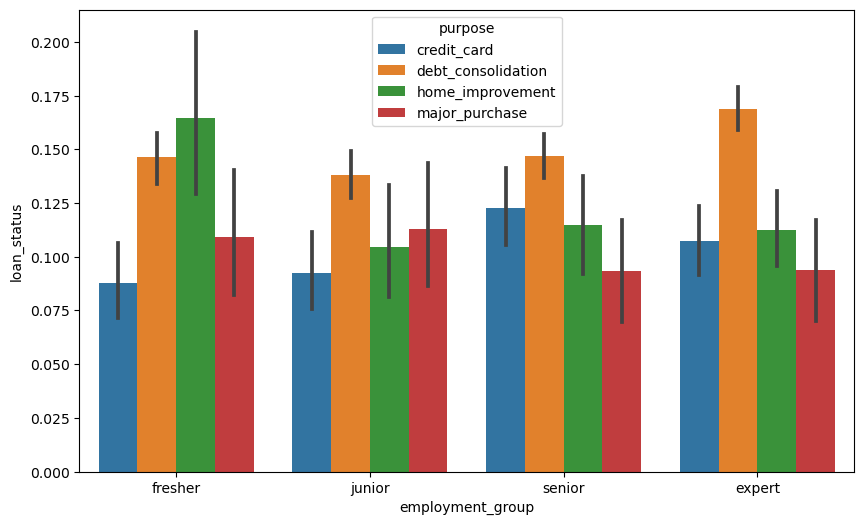

In [101]:
# emp_length
plot_segmented('employment_group')

* Freshers seem to default more in the **home improvement** department
* the rest of the employment lenghts follow the trend of having more default rates in **debt consolidation**
* but in general, the employment group doesnot seem to have much affect on the default rate

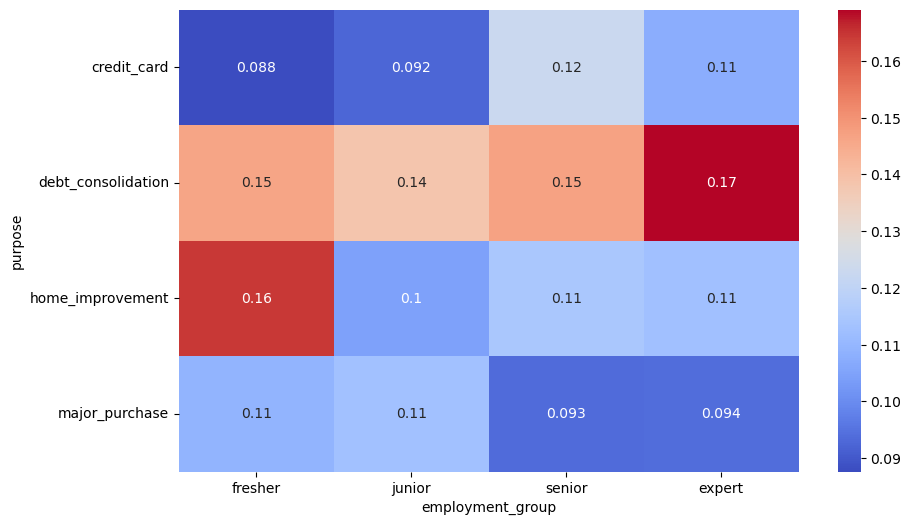

In [124]:
plot_heat('employment_group')

We can see that
* as seen in all the other comparisions, debt consolidation has the higher default rates.
* with the exception of in the case of freshers, home improvement has the highest default rate
* expert - debt consolidation has the highest default rate of all the combinations

##### default rate vs purpose vs loan amount

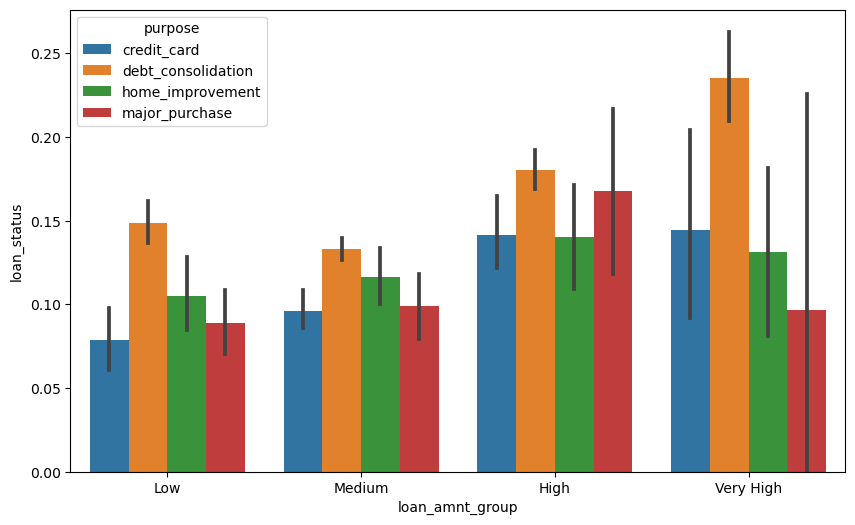

In [103]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt_group')

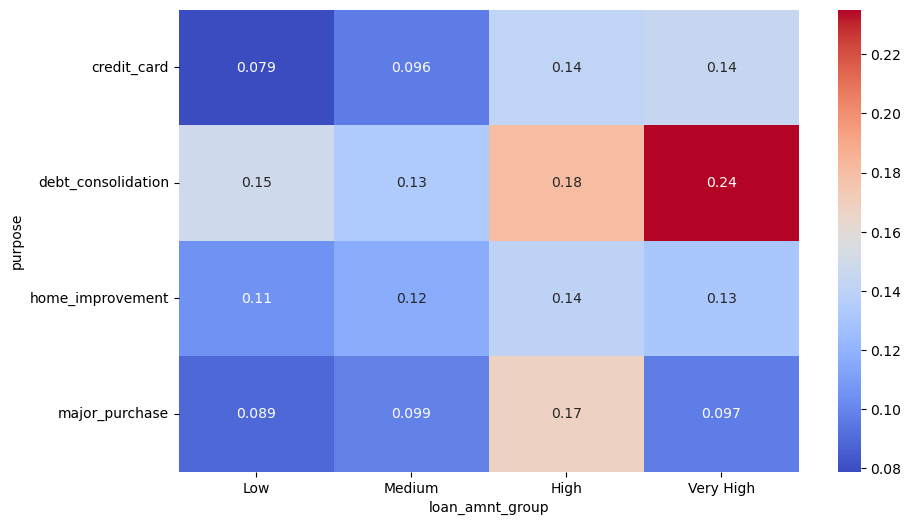

In [125]:
plot_heat('loan_amnt_group')

we can see that
* the loan amount also follows the same trend of **debt consolidation** having the higher default rate
* in general, the default rate increases from low to very high loan amounts

##### default rate vs purpose vs interest rate

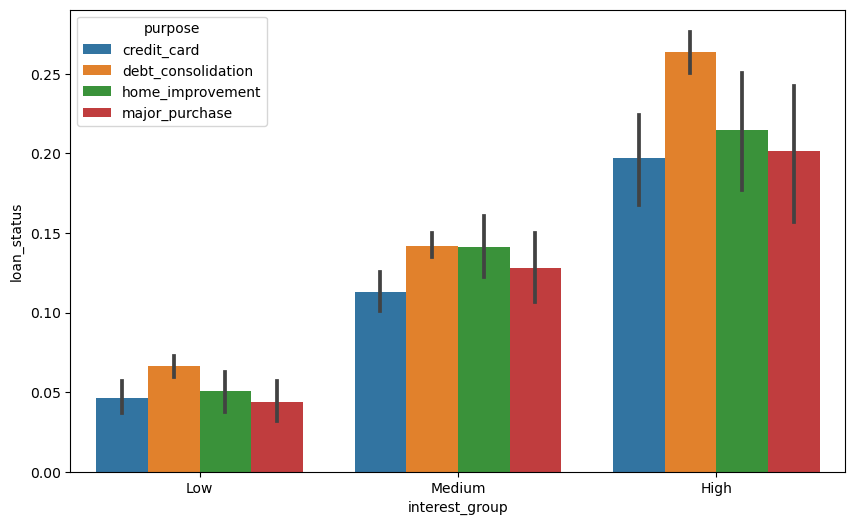

In [127]:
plot_segmented('interest_group')

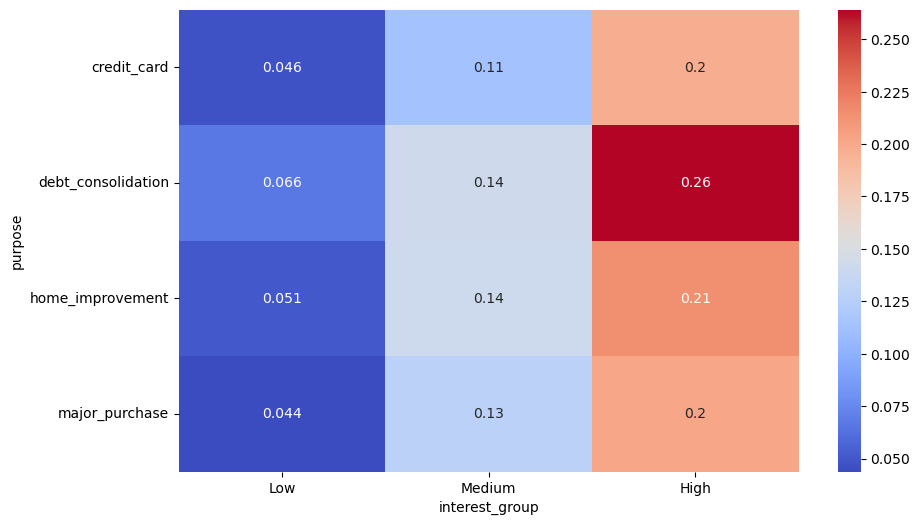

In [129]:
plot_heat('interest_group')

we can see that
* lower interest rates have lower default rates for all purposes of loans
* debt consolidation still has the higher default rates for all interest rates
* debt consolidation - high interest rate has the highest default rate of all the combinations
* the default rates increase drastically from low to high interest rates

##### default rate vs purpose vs installment amount

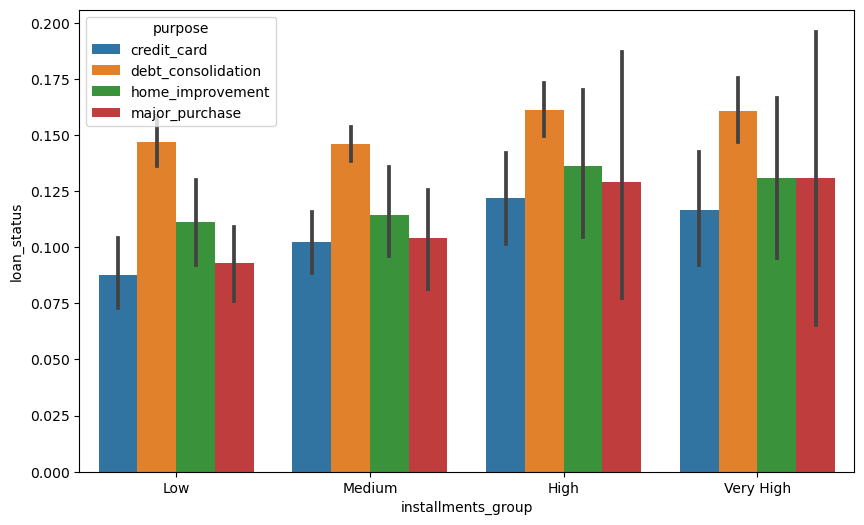

In [131]:
plot_segmented('installments_group')

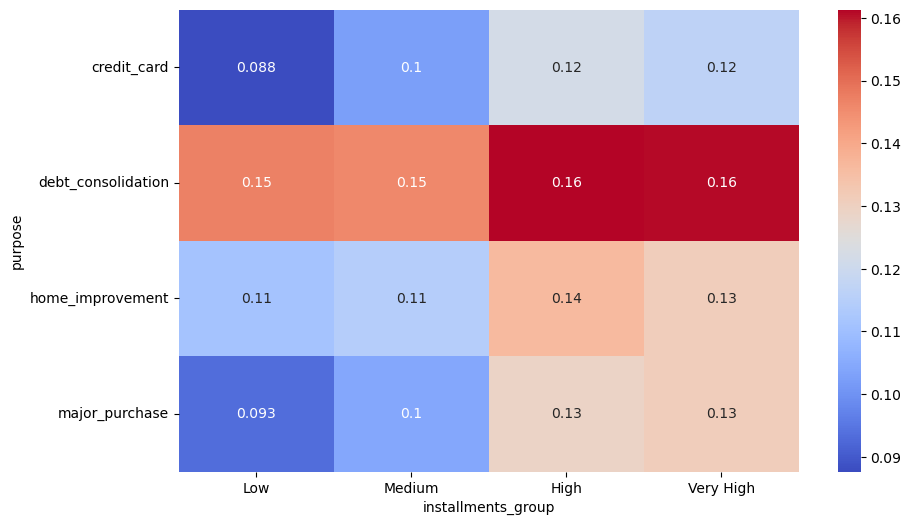

In [132]:
plot_heat('installments_group')

we can see that
* debt consolidation has the higher default rates for all installments amounts
* in general High and very high installments have a higher default rates
* with debt consolidation - high/ and debt consolidation - very high have the highest default rates among all the combinations

##### default rate vs purpose vs debt to income ration

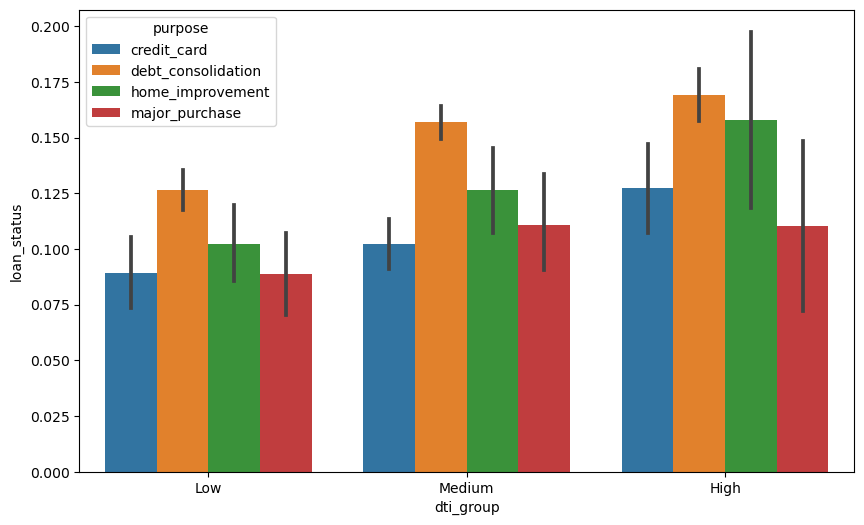

In [133]:
plot_segmented('dti_group')

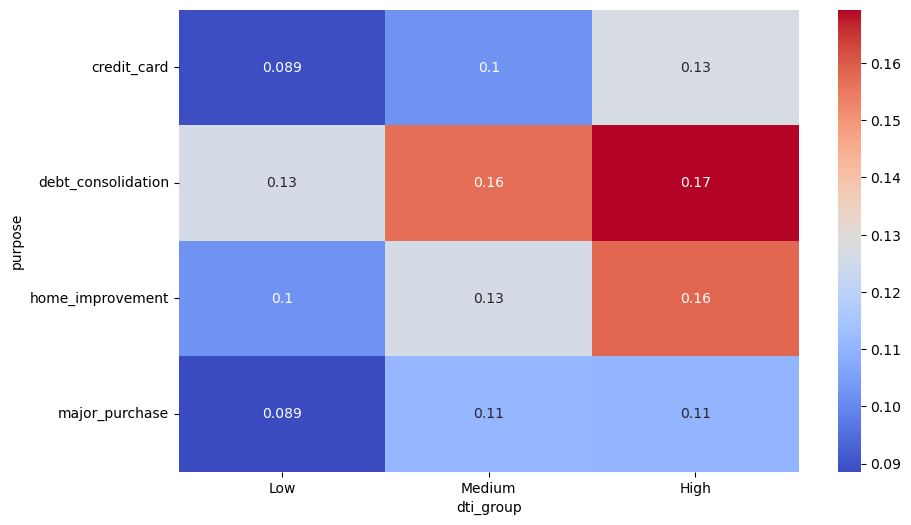

In [134]:
plot_heat('dti_group')

We can see that
* the default rates increase for all purposes from low to high dti ratio
* the debt consolidation has the higher default rate among all the dti ratios
* the debt consolidation - high dti ratio has the highest default rate

##### default rate vs purpose vs annual income

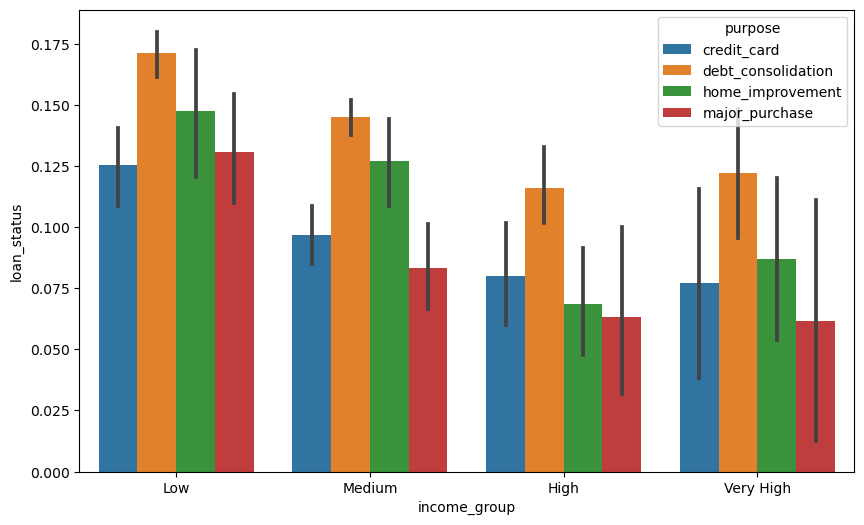

In [136]:
plot_segmented('income_group')

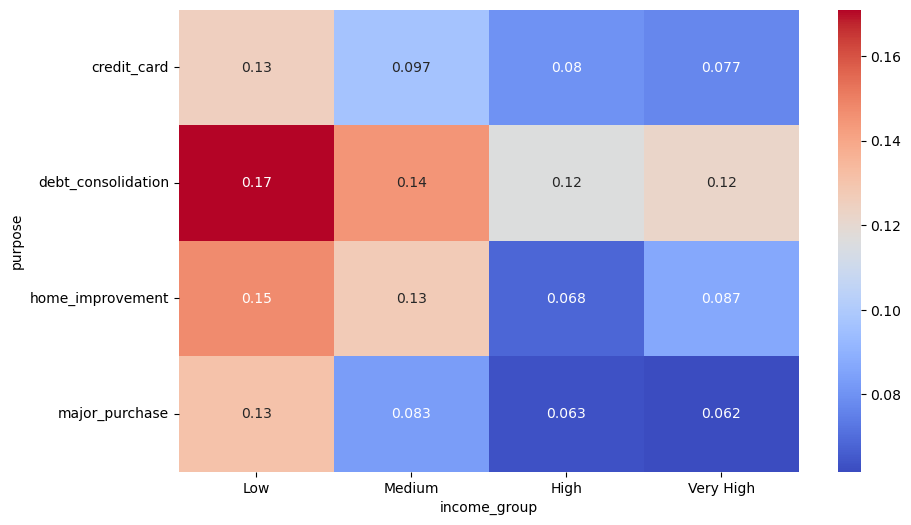

In [137]:
plot_heat('income_group')

We can see that
* there is a decrease in default rates from low to high income for all loan purposes
* as usual, debt consolidation has the higher default rates among all loan purposes
* with low income - debt consolidation having the highest default rate